In [70]:
#didn't have installed seaborn package so ran the code above 
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn


In [71]:
##Update conda is necessary
#conda update -n base -c defaults conda

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6) #adjust the configuration of the created plots

In [9]:
#read data

df = pd.read_csv('movies.csv')

In [72]:
# let's look at the data

df.head(3)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearreleased
0,The Shining,7,6,1980,1706,8.4,927000,2589,4015,1048,55,19000000,46998772,2320,146,1
1,The Blue Lagoon,7,1,1980,1493,5.8,65000,2269,1633,328,56,4500000,58853106,732,104,1
2,Star Wars: Episode V - The Empire Strikes Back,5,0,1980,1772,8.7,1200000,1111,2568,1746,56,18000000,538375067,1541,124,1


In [ ]:
df.fillna(0, inplace=True)

In [33]:
# lets see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [88]:
#Data types for our columns
df.dtypes

name             object
rating             int8
genre              int8
year              int64
released          int16
score           float64
votes             int64
director          int16
writer            int16
star              int16
country            int8
budget            int64
gross             int64
company           int16
runtime           int64
yearreleased       int8
dtype: object

In [34]:
#change data type for some columns

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')


In [40]:
#extract the year only on released date.
df["yearreleased"] = df["released"].astype(str).str.split(',').str[-1].str.strip().str[:4]

In [41]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearreleased
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980


In [73]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearreleased
5445,Avatar,6,0,2009,697,7.8,1100000,1155,1779,2335,56,237000000,2847246203,2254,162,30
7445,Avengers: Endgame,6,0,2019,184,8.4,903000,162,744,2242,56,356000000,2797501328,1607,181,40
3045,Titanic,6,6,1997,705,7.8,1100000,1155,1779,1596,56,200000000,2201647264,2254,194,18


In [43]:
#code below to see all the data.
pd.set_option('display.max_rows', None)

In [74]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearreleased
5445,Avatar,6,0,2009,697,7.8,1100000,1155,1779,2335,56,237000000,2847246203,2254,162,30
7445,Avengers: Endgame,6,0,2019,184,8.4,903000,162,744,2242,56,356000000,2797501328,1607,181,40
3045,Titanic,6,6,1997,705,7.8,1100000,1155,1779,1596,56,200000000,2201647264,2254,194,18


In [76]:
#drop dupliates
df['company'].astype(str).drop_duplicates().sort_values(ascending=False).head(10)

2098    999
2225    998
1054    997
90      996
4636    995
6111    994
5716    993
1231    992
3975    991
4456    990
Name: company, dtype: object

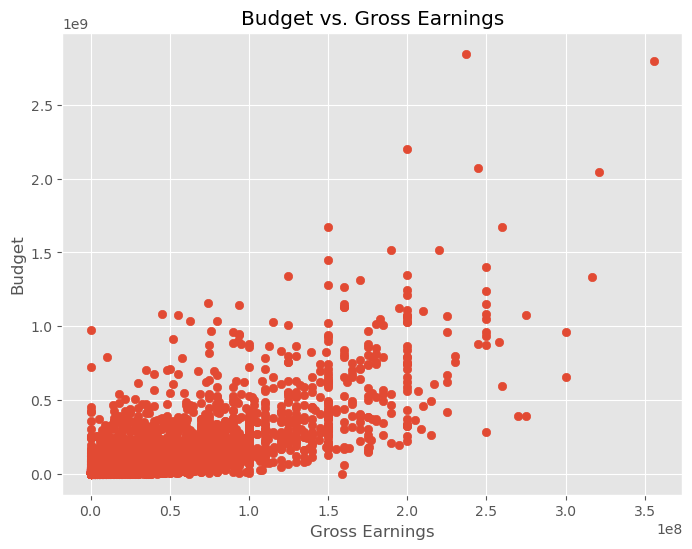

In [53]:
#scatter plot with budget vs. gross revenue
plt.scatter(x=df["budget"], y=df["gross"])

plt.title("Budget vs. Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget")

plt.show();

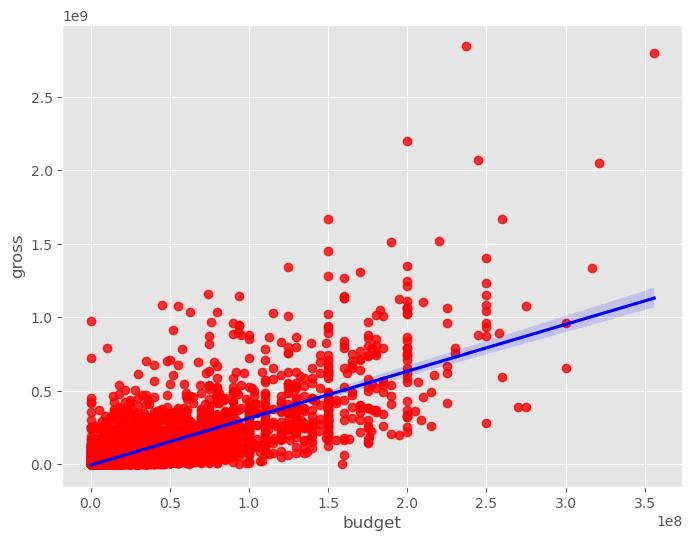

In [56]:
#sue seaborn  to add corelation curve
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"});


In [59]:
#let's start looking at correlation
#Three different types of correlation Pearson, kendall, spearman
df.corr(method="pearson") 

C:\Users\Roste\AppData\Local\Temp\ipykernel_3544\2387803651.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [60]:
df.corr(method="kendall") 

C:\Users\Roste\AppData\Local\Temp\ipykernel_3544\3077372944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="kendall")


,year,score,votes,budget,gross,runtime
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


In [61]:
df.corr(method="spearman")

C:\Users\Roste\AppData\Local\Temp\ipykernel_3544\3994303778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman")


,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


In [62]:
#high correlation between budget vs. Gross and also gross vs. votes which can also be analysed.
#spearman method is giving the best correlations on this situation.


C:\Users\Roste\AppData\Local\Temp\ipykernel_3544\1717807680.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method="spearman")


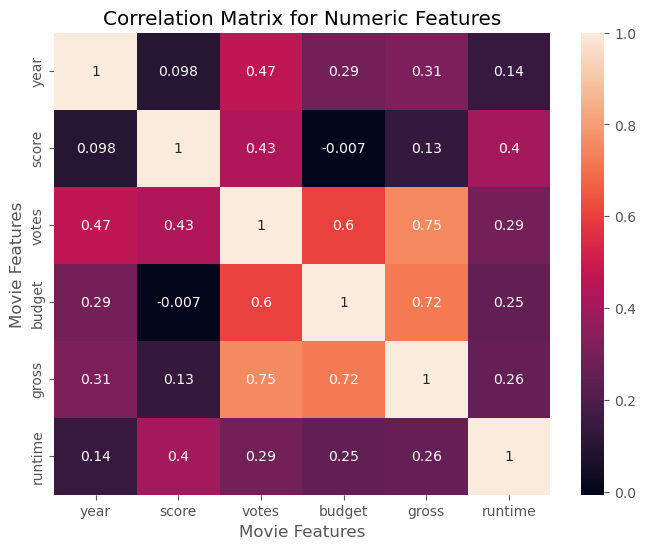

In [65]:
correlation_matrix = df.corr(method="spearman")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show();

In [89]:
# Looks at the company
#we can attach a numeric value for each company and see the company in the heatmap
#on the code below we numerize all the columns

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearreleased
0,6587,7,6,1980,1706,8.4,927000,2589,4015,1048,55,19000000,46998772,2320,146,1
1,5573,7,1,1980,1493,5.8,65000,2269,1633,328,56,4500000,58853106,732,104,1
2,5142,5,0,1980,1772,8.7,1200000,1111,2568,1746,56,18000000,538375067,1541,124,1
3,286,5,4,1980,1493,7.7,221000,1301,2001,2247,56,3500000,83453539,1813,88,1
4,1027,7,4,1980,1544,7.3,108000,1054,522,411,56,6000000,39846344,1778,98,1


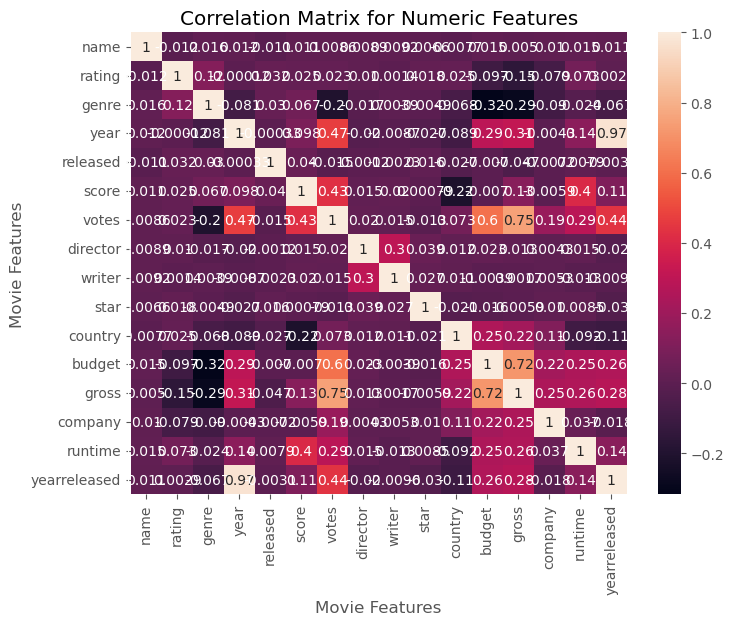

In [90]:
correlation_matrix = df_numerized.corr(method="spearman")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show();

In [91]:
#orginize correlations
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145296
votes         genre          -0.145296
country       score          -0.133346
score         country        -0.133346
rating        gross          -0.095450
gross         rating         -0.095450
yearreleased  country        -0.088438
country       yearreleased   -0.088438
rating        budget         -0.081939
budget        rating         -0.081939
genre         year           -0.081261
year          genre          -0.081261
country       runtime        -0.073319
runtime       country        -0.073319
genre         company        -0.071067
company       genre          -0.071067
country       year           -0.070938
year          country        -0.070938
genre         yearreleased   -0.065215
yearreleased  genre          -0.065215
genre         runtime        -0.052914
runtime       genre      

In [92]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         gross           0.632870
gross         votes           0.632870
budget        gross           0.750157
gross         budget          0.750157
yearreleased  year            0.961724
year          yearreleased    0.961724
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
yearreleased  yearreleased    1.000000
dtype: float64

In [ ]:
#We can see that votes and budget has a high correlation vs. Gross Earnings
#Company has low no correlation vs. Earning.